<a href="https://colab.research.google.com/github/Jueunkim429/Cloud-cloud/blob/main/CNN_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
!apt-get -qq install -y graphviz && pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [133]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
!pip install --upgrade face-compare

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.8 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.9
    Uninstalling flatbuffers-23.5.9:
      Successful

In [135]:
!pip install intel-tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached flatbuffers-23.5.9-py2.py3-none-any.whl (26 kB)
  Using cached protobuf-4.23.1-cp37-abi3-manylinux2014_x86_64.whl (304 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.7.0-py3-none-manylinux2014_x86_64.whl (6.6 MB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard-

In [136]:
import keras
print(keras.__version__)


2.12.0


In [137]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
from PIL import Image
import os, glob, numpy as np
import os
from sklearn.model_selection import train_test_split
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend import set_session as K
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from keras.preprocessing.image import ImageDataGenerator
import libarchive
import pydot
import cartopy

In [139]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.9
    Uninstalling flatbuffers-23.5.9:
      Successfully uninstalled flatbuffers-23.5.9
  Attempting uninstall: tensorflow-estimator
    Found existing inst

In [140]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import tensorflow.keras
print(tensorflow.keras.__version__)

2.12.0


In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## - ImageDataGenerator 를 활용하여 각 구름 종류별 데이터의 수를 1500개 이상으로 늘리기

In [142]:
def IDG(fname):
    # 초기값 설정
    file_name_freq = 0 
    ImageDG = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        zoom_range=0.1,
        fill_mode='nearest'
    )
    img = tensorflow.keras.preprocessing.image.load_img(fname)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 0
    save = fname.split('/')[0] + "/" + fname.split('/')[1] + "/" + fname.split('/')[2] + "/" + fname.split('/')[3]
    for batch in ImageDG.flow(
        x,
        batch_size=1,
        save_to_dir=save,
        save_prefix='new' + str(file_name_freq),  # Make sure file_name_freq is defined
        save_format='jpg'
    ):
        i += 1
        if i > 7:
            break
        file_name_freq += 1 # 증가시키기

In [143]:
folder_list = os.listdir('/content/drive/MyDrive/data/train')

fname =  "/content/drive/MyDrive/data/train/"
for f in folder_list:
    fname =  "/content/drive/MyDrive/data/train/" + f+"/"
    print(fname)
    file_list = os.listdir(fname)
    for i in file_list:
        filename = fname + i
        #print(filename)
        IDG(filename)

/content/drive/MyDrive/data/train/Ac/
/content/drive/MyDrive/data/train/As/
/content/drive/MyDrive/data/train/Cb/
/content/drive/MyDrive/data/train/Cc/
/content/drive/MyDrive/data/train/Ci/
/content/drive/MyDrive/data/train/St/
/content/drive/MyDrive/data/train/Ct/
/content/drive/MyDrive/data/train/Cu/
/content/drive/MyDrive/data/train/Sc/
/content/drive/MyDrive/data/train/Ns/
/content/drive/MyDrive/data/train/Cs/


## Image 데이터를 학습 데이터로 변환

In [144]:
img_dir =  "/content/drive/MyDrive/data/train/"
categories = os.listdir(img_dir) 
num_classes = len(categories)
 
image_w = 64  #64*64*3 사이즈로 조정
image_h = 64
 
pixel=  image_w * image_h * 3 
X=[]
y=[]
 
for idx, cat in enumerate(categories): # 카테고리를 enumerate를 이용하여 카테고리와 인덱스 사용
    img_dir_detail = img_dir + '/' + cat
    files = glob.glob(img_dir_detail + "/*.jpg")
    for i,f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert('RGB')
            img = img.resize((image_w,image_h)) #이미지의 사이즈를 조정
            data = np.asarray(img)
            X.append(data)
            y.append(idx)
            if i % 300 == 0 : # 300번쨰 마다 프린트
                print(cat, " : ", f)
        except:
            print(cat,str(i)," 번째에서 에러")
            
X = np.array(X)  #array로 변환
y = np.array(y)  #array로 변환
 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) #train test 구분

Ac  :  /content/drive/MyDrive/data/train//Ac/Ac-N054.jpg
As  :  /content/drive/MyDrive/data/train//As/As-N006.jpg
Cb  :  /content/drive/MyDrive/data/train//Cb/Cb-N027.jpg
Cc  :  /content/drive/MyDrive/data/train//Cc/Cc-N052.jpg
Ci  :  /content/drive/MyDrive/data/train//Ci/Ci-N001.jpg
St  :  /content/drive/MyDrive/data/train//St/St-N032.jpg
Ct  :  /content/drive/MyDrive/data/train//Ct/Ct-N041.jpg
Cu  :  /content/drive/MyDrive/data/train//Cu/Cu-N005.jpg
Sc  :  /content/drive/MyDrive/data/train//Sc/Sc-N050.jpg
Sc  :  /content/drive/MyDrive/data/train//Sc/Sc-N267.jpg
Ns  :  /content/drive/MyDrive/data/train//Ns/Ns-N046.jpg
Cs  :  /content/drive/MyDrive/data/train//Cs/Cs-N041.jpg


## 학습데이터 가공

In [145]:
print(X_train.shape) # 데이터 크기 확인
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
 
# img를 array로 변환시 0~255의 값을 가지는데 이것을 0~1로 변환
X_train = X_train.astype(float) / 255.0 
X_test = X_test.astype(float) / 255.0
 
from keras.utils import to_categorical
# 기존의 1의 값을가지는 y값을 [0,1,0,0,---]와 같이 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(1626, 64, 64, 3)
(1626,)
(697, 64, 64, 3)
(697,)


## 모델 구축

In [146]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
  Using cached flatbuffers-23.5.9-py2.py3-none-any.whl (26 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached protobuf-4.23.1-cp37-abi3-manylinux2014_x86_64.whl (304 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.7.0-py3-none-manylinux2014_x86_64.whl (6.6 MB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimato

In [147]:
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [148]:
image_w = 64
image_h = 64
 
with tf.device('/device:CPU:0'): #가동할 GPU가 없어 CPU로 설정
    model = Sequential() # 모델 선언
  
    # (Convolution layer , Pooling layer) 2개 다중분류여서 activation 은 모두 relu사용
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu")) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25)) #과적합 방지 
              
    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    #FC layer
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    #loss= 다중분류 categorical사용          
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])
    
    model_dir = './model'
    model_path = model_dir + "/cloud_classify.model"
    # 모델결과 저장 및 earlystopping
    checkpoint = ModelCheckpoint(filepath = model_path, monitor='val_loss', verbose = 1, save_best_only = True)
    early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)

In [149]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.15, callbacks=[checkpoint, early_stopping])


Epoch 1/100


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
22/22 [==============================] - ETA: 0s - loss: 2.5297 - accuracy: 0.1556

ValueError: ignored

In [150]:
# Assuming you have imported the necessary modules and defined your model

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert the true labels to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the accuracy
accuracy = np.mean(y_pred_labels == y_test_labels)
print("정확도: %.2f" % accuracy)


22/22 [==============================] - 3s 141ms/step
정확도: 0.14


In [151]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [152]:
with tf.device('/device:CPU:0'):
    model2 = Sequential()
  
    model2.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))
              
    model2.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))
    
    model2.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model2.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))
    
    model2.add(Flatten())
    model2.add(Dense(256, activation = 'relu'))
    model2.add(Dropout(0.5))
    model2.add(Dense(num_classes, activation = 'softmax'))
              
    model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])
    
    model_dir = './model2'
    model_path = model_dir + "/cloud_classify.model2"
    
    checkpoint = ModelCheckpoint(filepath = model_path, monitor='val_loss', verbose = 1, save_best_only = True)
    early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)


In [153]:
#print("정확도 : %.2f" %(model2.evaluate(X_test, y_test)[1]))
# Assuming you have imported the necessary modules and defined your model

# Make predictions on the test data
y_pred = model2.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert the true labels to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the accuracy
accuracy = np.mean(y_pred_labels == y_test_labels)
print("정확도: %.2f" % accuracy)

22/22 [==============================] - 6s 278ms/step
정확도: 0.15


In [155]:
from keras.models import load_model
 
path = "/content/drive/MyDrive/data/test/"
category = os.listdir("/content/drive/MyDrive/data/train")
 
image_w = 64
image_h = 64
 
pixels = image_h * image_w * 3
 
X = []
filenames = []
files = glob.glob(path+"/*.*")
for f in files:
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
 
X = np.array(X)
prediction_test = model.predict(X)
 
file_index = 0
for i in prediction_test:
    label = i.argmax() # [0.000, 0.000, 0.000, ..., 0.000, 1.000, 0.000] 중 최대값 추출 즉,1값의 인덱스
    print("////////////////////")
    print( filenames[file_index].split('\\')[-1] + "의 예측되는 구름종류 : " + category[label])
    file_index  = file_index+1


7/7 [==============================] - 1s 75ms/step
////////////////////
/content/drive/MyDrive/data/test/79.jpg의 예측되는 구름종류 : Cc
////////////////////
/content/drive/MyDrive/data/test/80.jpg의 예측되는 구름종류 : Sc
////////////////////
/content/drive/MyDrive/data/test/77.jpg의 예측되는 구름종류 : Sc
////////////////////
/content/drive/MyDrive/data/test/75.jpg의 예측되는 구름종류 : Sc
////////////////////
/content/drive/MyDrive/data/test/76.jpg의 예측되는 구름종류 : Cc
////////////////////
/content/drive/MyDrive/data/test/7.jpg의 예측되는 구름종류 : Sc
////////////////////
/content/drive/MyDrive/data/test/69.jpg의 예측되는 구름종류 : Sc
////////////////////
/content/drive/MyDrive/data/test/74.jpg의 예측되는 구름종류 : Sc
////////////////////
/content/drive/MyDrive/data/test/73.jpg의 예측되는 구름종류 : Sc
////////////////////
/content/drive/MyDrive/data/test/68.jpg의 예측되는 구름종류 : Sc
////////////////////
/content/drive/MyDrive/data/test/65.jpg의 예측되는 구름종류 : Sc
////////////////////
/content/drive/MyDrive/data/test/66.jpg의 예측되는 구름종류 : Sc
////////////////////
/con

## 찍은 사진으로 확인해보기

1/1 [==============================] - 0s 54ms/step
////////////////////
/content/drive/MyDrive/cloud_data/cloud1.jpg의 예측되는 구름종류 : Sc


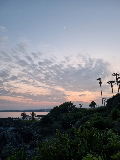

////////////////////
/content/drive/MyDrive/cloud_data/cloud3.jpg의 예측되는 구름종류 : Sc


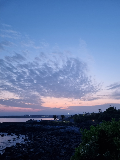

////////////////////
/content/drive/MyDrive/cloud_data/cloud10.jpg의 예측되는 구름종류 : Sc


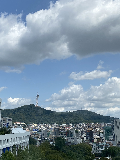

////////////////////
/content/drive/MyDrive/cloud_data/cloud.jpg의 예측되는 구름종류 : Sc


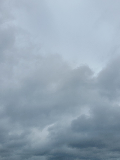

////////////////////
/content/drive/MyDrive/cloud_data/cloud2.jpg의 예측되는 구름종류 : Sc


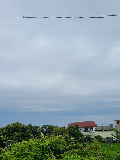

////////////////////
/content/drive/MyDrive/cloud_data/cloud4.jpg의 예측되는 구름종류 : Sc


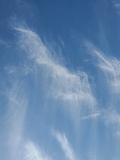

////////////////////
/content/drive/MyDrive/cloud_data/cloud5.jpg의 예측되는 구름종류 : Sc


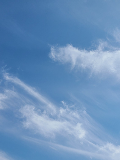

////////////////////
/content/drive/MyDrive/cloud_data/cloud6.jpg의 예측되는 구름종류 : Sc


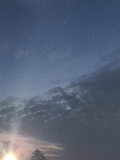

////////////////////
/content/drive/MyDrive/cloud_data/cloud7.jpg의 예측되는 구름종류 : Sc


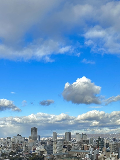

////////////////////
/content/drive/MyDrive/cloud_data/cloud8.jpg의 예측되는 구름종류 : Sc


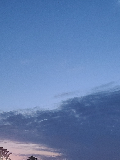

////////////////////
/content/drive/MyDrive/cloud_data/cloud9.jpg의 예측되는 구름종류 : Cc


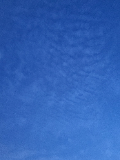

In [156]:
import cv2
from google.colab.patches import cv2_imshow
path2 = "/content/drive/MyDrive/cloud_data"
category = os.listdir("/content/drive/MyDrive/data/train")
 
image_w = 64
image_h = 64
 
pixels = image_h * image_w * 3
 
X = []
filenames = []
files = glob.glob(path2+"/*.*")
for f in files:
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
 
X = np.array(X)
prediction_test = model.predict(X)
 
file_index = 0
for i in prediction_test:
    label = i.argmax() # [0.000, 0.000, 0.000, ..., 0.000, 1.000, 0.000] 중 최대값 추출 즉,1값의 인덱스
    print("////////////////////")
    print( filenames[file_index].split('\\')[-1] + "의 예측되는 구름종류 : " + category[label])


    img = cv2.imread(filenames[file_index])
    img=cv2.resize(img,dsize=(120,160))
    cv2_imshow(img)
    file_index  = file_index+1